# RA指标
## Compute the resource allocation index of all node pairs in ebunch.

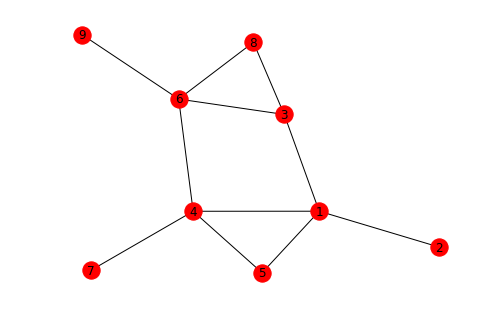

(1, 2) -> 0.00000000
(1, 6) -> 0.58333333
(1, 5) -> 0.25000000


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(4,5),(4,6),(4,7),(1,5),(3,6),(6,8),(6,9),(3,8)],index=0)
nx.draw(G,with_labels=True)
plt.show()
preds = nx.resource_allocation_index(G, [(1, 2),(1,6), (1,5)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

In [30]:
a = nx.all_simple_paths(G, 1, 6, cutoff=4)
list(a)

[[1, 3, 6], [1, 3, 8, 6], [1, 4, 6], [1, 5, 4, 6]]

In [26]:
def _apply_prediction(G, func, ebunch=None):
    """Applies the given function to each edge in the specified iterable
    of edges.

    `G` is an instance of :class:`networkx.Graph`.

    `func` is a function on two inputs, each of which is a node in the
    graph. The function can return anything, but it should return a
    value representing a prediction of the likelihood of a "link"
    joining the two nodes.

    `ebunch` is an iterable of pairs of nodes. If not specified, all
    non-edges in the graph `G` will be used.

    """
    print('====')
    if ebunch is None:
        ebunch = nx.non_edges(G)
    return ((u, v, func(u, v)) for u, v in ebunch)

In [27]:
def compute_katz(G, ebunch=None):
    # 计算两个节点之间各种路径长度的数目
    def summary_paths_length(G, source, target,n= 50):
        print('+++')
        print(source, target)
        re ={}
        paths = list(nx.shortest_simple_paths(G, source, target))
        print('---')
        for p in paths:
            print('0000')
            i = len(p)-1
            if i < n:   
                if i in re.keys():
                    re[i] += 1
                else:
                    re[i] = 1    
        return(re)
    
    def predict(u, v,beta=0.1):
        katz_socre = 0
        re = summary_paths_length(G, u, v)
        for key,values in  re.items():
            katz_socre += katz_socre + beta**key*values 
        return(katz_socre) 

    return _apply_prediction(G, predict, ebunch)


In [28]:
preds = compute_katz(G, [(1, 2),(1,6), (1,5),(2,5)])
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

====
+++
1 2
---
0000
(1, 2) -> 0.10000000
+++
1 6
---
0000
0000
0000
0000
(1, 6) -> 0.04200000
+++
1 5
---
0000
0000
0000
0000
(1, 5) -> 0.84021000
+++
2 5
---
0000
0000
0000
0000
(2, 5) -> 0.08402100


[0.1, 0.04200000000000001, 0.8402100000000001, 0.08402100000000001]

In [20]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

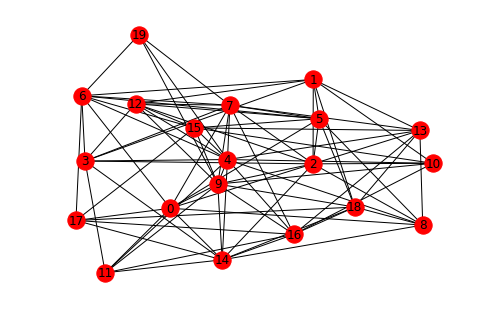

190
105
节点的个数为 20
边的条数为 68


In [21]:
G = nx.dense_gnm_random_graph(20,85, seed=None)
nx.draw(G,with_labels=True)
plt.show()

n_n = G.number_of_nodes()
n_e = G.number_of_edges()

# 获取所有可能的边
oo = list()
for i in range(n_n-1):
    for j in range(i+1,n_n):
        oo.append((i,j))
        
u_edges = set(oo)
print(len(u_edges)) 

# 获取原本不存在的边
unexist_edges = u_edges - G.edges()
unexist_edges = list(unexist_edges)
print(len(unexist_edges)) 

# 从确实链接和不存在链接中都随机抽取n_s个用于后续计算得分
n_s = 10

a = set(range(len(unexist_edges)))
b = set(random.sample(range(len(unexist_edges)),n_s)) 
b = list(b)

# 挑选出不存在的边用于后续计算预测得分
cho_unexist_edges = [unexist_edges[i] for i in b]
cho_unexist_edges

a = set(range(n_e))
b = set(random.sample(range(n_e),int(n_e*0.2) )) # 存测试边的下标
c = a-b
b = list(b)
b = random.sample(b,n_s)                           # 随机挑选几个用于后续计算边的得分
c = list(c)  

all_edges = list(G.edges())
train_edges = [all_edges[i] for i in c]
cho_exist_edges = [all_edges[i] for i in b]
G = nx.Graph()
G.add_edges_from(train_edges)
print("节点的个数为",G.number_of_nodes())
print("边的条数为",G.number_of_edges())

cho_exist_edges.extend(cho_unexist_edges)
# 保持缺失链接在不存在链接前
test_edges = cho_exist_edges

In [23]:
test_edges

[(7, 9),
 (0, 6),
 (9, 12),
 (13, 16),
 (3, 6),
 (0, 7),
 (1, 18),
 (9, 19),
 (2, 5),
 (14, 16),
 (6, 18),
 (13, 17),
 (3, 8),
 (0, 12),
 (3, 9),
 (0, 4),
 (7, 17),
 (3, 18),
 (11, 19),
 (1, 15)]

In [24]:
preds = compute_katz(G, [(7,9),(0,6)])
score = []
for u, v, p in preds:
    score.append(p)
    print('(%d, %d) -> %.8f' % (u, v, p))

score[0:5]

====
+++
7 9


KeyboardInterrupt: 

(1,2)由于没有共同邻居，得分为0
（1,5）共同邻居是4，节点4有4个邻居，所以是0.25

# Jaccard指标
## Compute the Jaccard coefficient of all node pairs in ebunch.

In [13]:
preds = nx.jaccard_coefficient(G, [(1, 2), (1,5),(1,6)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 0.00000000
(1, 5) -> 0.20000000
(1, 6) -> 0.33333333


# Adamic-Adar指标
## Compute the Adamic-Adar index of all node pairs in ebunch

In [14]:
preds = nx.adamic_adar_index(G, [(1, 2), (1,5),(1,6)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 0.00000000
(1, 5) -> 0.72134752
(1, 6) -> 1.63158675


# attachment score
## Compute the preferential attachment score of all node pairs in ebunch.

In [15]:
preds = nx.preferential_attachment(G, [(1, 2), (1,5),(1,6)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

(1, 2) -> 4.00000000
(1, 5) -> 8.00000000
(1, 6) -> 16.00000000


# cn_soundarajan
## Count the number of common neighbors of all node pairs in ebunch using community information. 
   

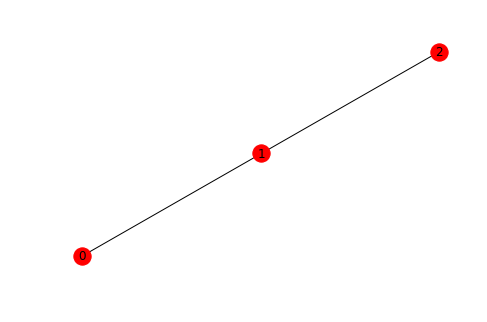

(0, 2) -> 2.00000000


In [17]:
G = nx.path_graph(3)
nx.draw(G,with_labels=True)
plt.show()
G.nodes[0]['community'] = 0
G.nodes[1]['community'] = 0
G.nodes[2]['community'] = 0
preds = nx.cn_soundarajan_hopcroft(G, [(0, 2)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

#  resource allocation index using community information.
## Compute the resource allocation index of all node pairs in ebunch using community information.

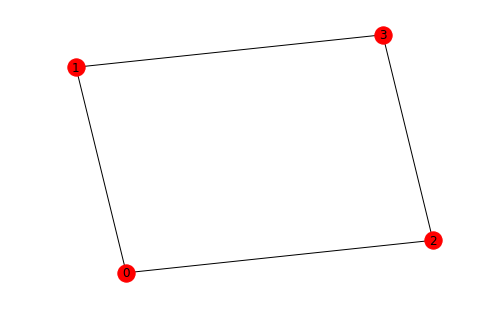

(0, 3) -> 0.50000000


In [20]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3)])
nx.draw(G,with_labels=True)
plt.show()
G.nodes[0]['community'] = 0
G.nodes[1]['community'] = 0
G.nodes[2]['community'] = 1
G.nodes[3]['community'] = 0
preds = nx.ra_index_soundarajan_hopcroft(G, [(0, 3)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

# WIC
## Compute the ratio of within- and inter-cluster common neighbors of all node pairs in ebunch.

For two nodes u and v, if a common neighbor w belongs to the same community as them, w is considered as within-cluster common neighbor of u and v. Otherwise, it is considered as inter-cluster common neighbor of u and v. The ratio between the size of the set of within- and inter-cluster common neighbors is defined as the WIC measure. [1]

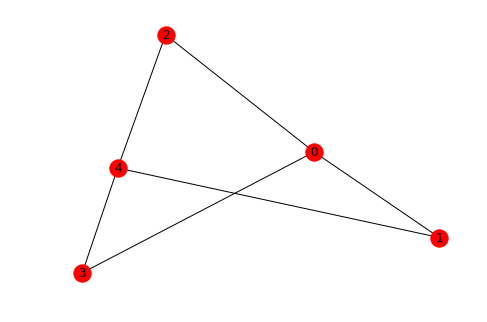

(0, 4) -> 1.99800200
(0, 4) -> 1.33333333


In [22]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4)])
G.nodes[0]['community'] = 0
G.nodes[1]['community'] = 1
G.nodes[2]['community'] = 0
G.nodes[3]['community'] = 0
G.nodes[4]['community'] = 0
nx.draw(G,with_labels=True)
plt.show()
preds = nx.within_inter_cluster(G, [(0, 4)])
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))


preds = nx.within_inter_cluster(G, [(0, 4)], delta=0.5)
for u, v, p in preds:
    print('(%d, %d) -> %.8f' % (u, v, p))

In [66]:
import random

In [85]:
all_edges = list(G.edges())
print(all_edges)

slice_edges = random.sample(range(5),2)

print(slice_edges)
[all_edges[i] for i in slice_edges]

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 4), (3, 4), (3, 5)]
[3, 4]


[(1, 4), (1, 5)]

In [92]:
a = set([1,3,5,6])
b = set([1,5])
c = a - b
list(c)

[3, 6]

In [93]:
G = nx.Graph()
G.add_edges_from([all_edges[i] for i in list(c)])

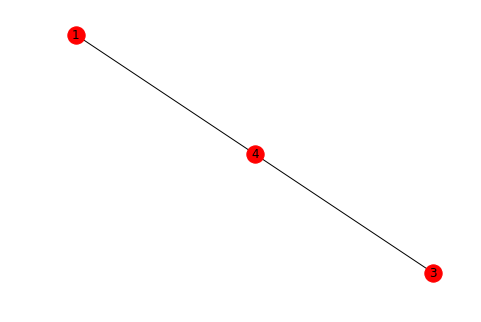

In [94]:
nx.draw(G,with_labels=True)
plt.show()

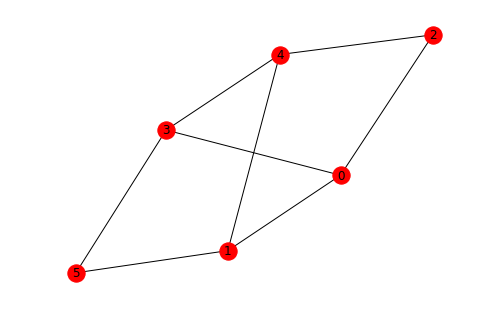

[[0, 3], [0, 1, 4, 3], [0, 2, 4, 3], [0, 1, 5, 3], [0, 2, 4, 1, 5, 3]]


In [8]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (2, 4), (3, 4),(1,5),(5,3)])
nx.draw(G,with_labels=True)
plt.show()
paths = list(nx.shortest_simple_paths(G, 0, 3))
print(paths)

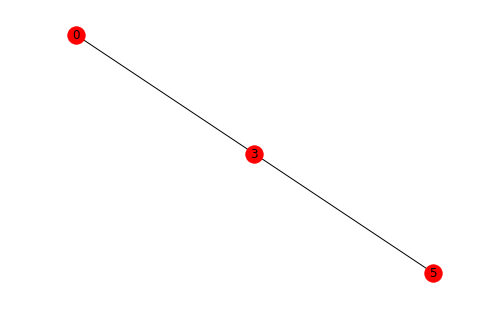

In [59]:
sg = nx.subgraph(G,[0,3,5])
nx.draw(sg,with_labels=True)
plt.show()

In [28]:
from itertools import islice
def k_shortest_paths(G, source, target, k, weight=None):
    return list(islice(nx.shortest_simple_paths(G, source, target, weight=weight), k))
for path in k_shortest_paths(G, 0, 3, 2):
    print(path)

[0, 3]
[0, 1, 4, 3]


In [45]:
# 计算两个节点之间各种路径长度的数目
def summary_paths_length(G, source, target,n= 50):
    re ={}
    paths = list(nx.shortest_simple_paths(G, source, target))
    for p in paths:
        i = len(p)-1
        if i < n:   
            if i in re.keys():
                re[i] += 1
            else:
                re[i] = 1    
    return(re)

In [46]:
summary_paths_length(G,0,3)

{1: 1, 3: 3, 5: 1}

In [47]:
# katz指标 全域指标
def compute_katz(G, source, target,beta=0.1):
    katz_socre = 0
    re = summary_paths_length(G, source, target)
    for key,values in  re.items():
        katz_socre += katz_socre + beta**key*values 
    return(katz_socre)    

In [48]:
compute_katz(G, 0, 3,beta=0.1)

0.40601000000000004

In [55]:
# LP指标 准局域指标
def compute_LP(G, source, target,n,beta=0.1):
    LP_socre = 0
    re = summary_paths_length(G, source, target,n)
    for key,values in  re.items():
        LP_socre += LP_socre + beta**key*values 
    return(LP_socre)  

In [56]:
compute_LP(G, 0, 3,3,beta=0.1)

0.1